# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [ ]:
import pandas as pd
import seaborn as sns

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [ ]:
# temperature data 1
url1 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv"
df = pd.read_csv(url1)
df.head()

In [ ]:
# temperature data 2
url2 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv"
df2 = pd.read_csv(url2)
df2.head()

In [ ]:
# merge into large dataframe
df_merged = pd.concat([df, df2])
df_merged.reset_index(drop=True, inplace=True) # ensure no duplicate columns
df_merged

## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [ ]:
# read in FIPS code data
fips = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")
fips

In [ ]:
# read in station_metadata 
station_metadata = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")
station_metadata

In [ ]:
# notice that the first two letters of ID correspond to the FIPS code
station_metadata["FIPS 10-4"] = station_metadata["ID"].str[0:2]
station_metadata.head()

In [ ]:
# merge the fips and station_metadata datasets
df = pd.merge(fips, station_metadata, on=["FIPS 10-4"])
df

In [ ]:
# merge df with df_merged (from part 1)
df = pd.merge(df, df_merged, on=["ID"])
df

In [ ]:
# drop unneeded columns
df = df.drop(["FIPS 10-4", "ISO 3166", "STNELEV"], axis=1)
df

In [ ]:
# convert all the columns that we don't want to stack into a multi-index for the data frame
df = df.set_index(keys = ["Name", "ID", "LATITUDE", "LONGITUDE", "NAME", "Year"])
df

In [ ]:
# stack data
df = df.stack()
df

In [ ]:
# recover Name, ID, LATITUDE, LONGITUDE, NAME, and Year columns
df = df.reset_index()
# rename columns
df = df.rename(columns={"level_6":"Month", 0:"Temp", "Name":"Country"})
df

In [ ]:
# Modify the month column
df["Month"] = df["Month"].str[5:].astype(int) # look at the number after VALUE_ (start at index 5)

# Change Temp column to be in units of Celsius (divide by 100)
df["Temp"] = df["Temp"]/100

# Display final data frame
df

## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [ ]:
def query_climate(df, country, year_begin, year_end, month):
    """
    Returns a Pandas dataframe of temperature readings for the specified country, in the specified country,
    in the specified date range, in the specified month of the year
    
    Args: 
    df: file name for dataframe
    country: string, name of the country
    year_begin: integer, earliest year for which should be returned
    year_end: integer, latest year for which should be returned
    month: integer, month of the year for which should be returned
    
    Output: Pandas dataframe with the following columns:
    NAME: station name
    LATITUDE: latitude of the station
    LONGITUDE: longitude of the station
    Country: name of the country in which the station is located
    Year: the year in which the reading was taken
    Month: the month in whcih the reading was taken
    Temp: the temperature at the specified station during the specified year and month
    """
    # set dataframe
    df = df

    # filter the dataframe to include only rows with the specified country
    df = df[df['Country'] == country]

    # filter the dataframe to include only rows with a year between year_begin and year_end
    df = df[(df['Year'] >= year_begin) & (df['Year'] <= year_end)]

    # filter the dataframe to include only rows with the specified month
    df = df[df['Month'] == month]
    
    # reorder the columns to the desired order
    df = df[['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp']]

    # return the filtered dataframe
    return df

Run this example and check if you get the correct result, your obtained dataframe looks like:

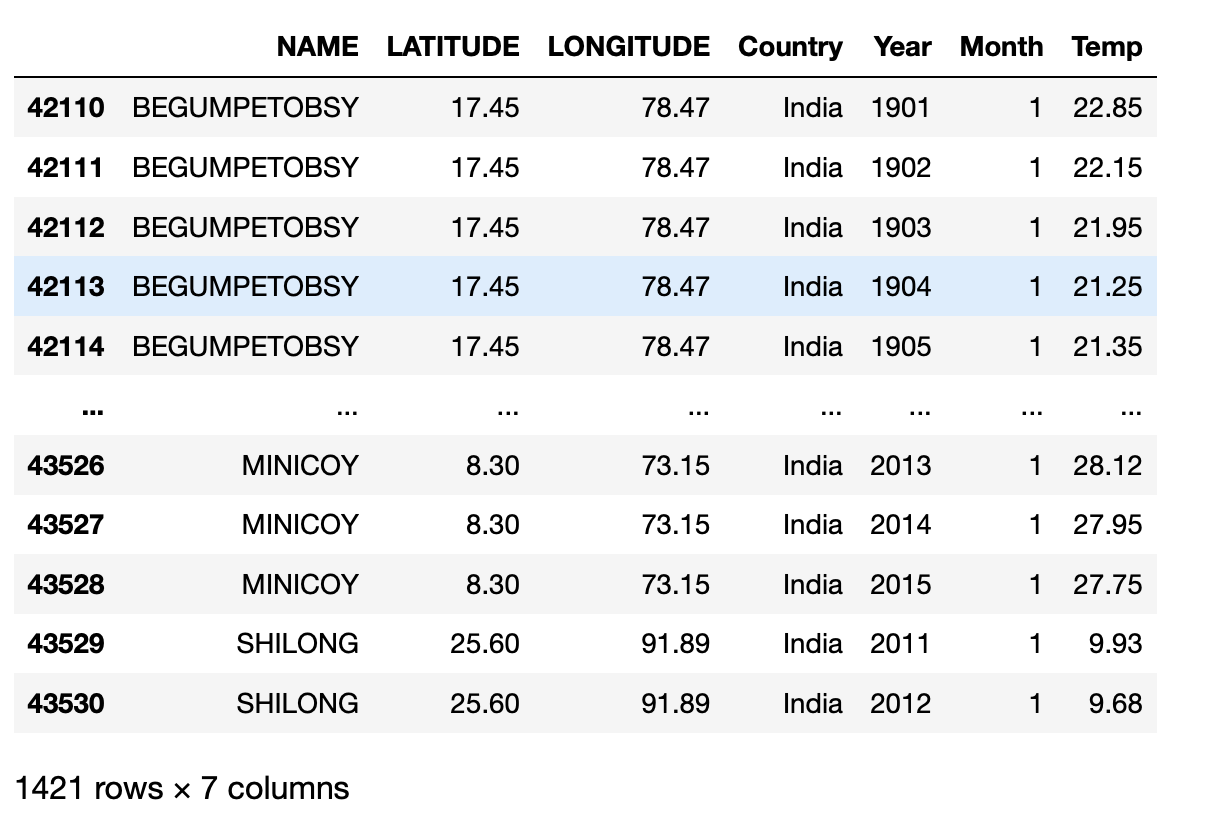

In [ ]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

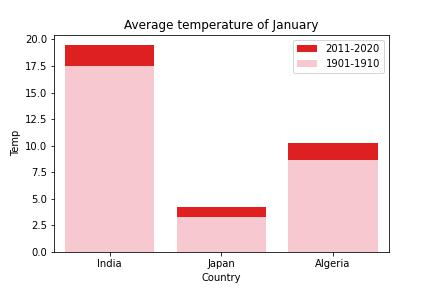

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

def plot_temp_comparison(df, countries, months, decade1_range, decade2_range):
    """
    Returns a figure with 6 subplots, displaying the average temperature of four different countries
    Each subplot represents the average temperatures for one month in the year
    Each subplot also includes a differentiation in the average temperature between 1901-1910 and 2011-2020
    
    Inputs: dataframe, the countries, months, and decade ranges
    Output: figure with six subplots given the inputs
    """
    # create six figures
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)
    axes = axes.flatten()
    
    # iterate through each month to create a subplot
    for idx, month in enumerate(months):
        ax = axes[idx]
        
        # create lists to store the average temperatures for each country
        avg_temps_decade1 = []
        avg_temps_decade2 = []
        
        for country in countries:
            # filter the dataframe and calculate averages for the first decade
            temps_decade1 = df[(df['Country'] == country) &
                               (df['Year'].between(*decade1_range)) &
                               (df['Month'] == month)]["Temp"]
            avg_temps_decade1.append(temps_decade1.mean())
            
            # filter the dataframe and calculate averages for the second decade
            temps_decade2 = df[(df['Country'] == country) &
                               (df['Year'].between(*decade2_range)) &
                               (df['Month'] == month)]["Temp"]
            avg_temps_decade2.append(temps_decade2.mean())  
        
        # define the bar positions
        bar_positions = np.arange(len(countries))
        
        # plot the bars for each decade
        ax.bar(bar_positions, avg_temps_decade1, 0.4, label='1901-1910', color='red', alpha=0.7)
        ax.bar(bar_positions, avg_temps_decade2, 0.4, label='2011-2020', color='pink', alpha=0.7)
        
        # create the labels and titles
        ax.set_xticks(bar_positions)
        ax.set_xticklabels(countries)
        ax.set_title(f'Average Temp of {calendar.month_name[month]}')
        ax.set_ylabel('Average Temperature (°C)')
        ax.set_xlabel('Country')
        ax.legend()
    
    plt.show()
    
countries = ['United States', 'Japan', 'India', 'Zimbabwe']
months = [1, 2, 3, 4, 5, 6]
decade1_range = (1901, 1910)
decade2_range = (2011, 2020)

plot_temp_comparison(df, countries, months, decade1_range, decade2_range)

It seems like India, on average, has the highest average temperatures for every month with the exception of January, where it is just passed by Zimbabwe. The United States has the lowest average temperatures per month. 
The temperature of India stays the most constant compared to the United States, Japan, and Zimbabwe. Though it does increase as the year approaches the spring and summer months, the temperatures in the winter months are not super low. An interesting trend to note is that Zimbabwe actually decreases in average temperature as it approaches the spring and summer months compared to the winter months. The United States has the most drastic temperature change between winter in spring months in our example, but it does appear to be a steady increase. 

In addition, we also see that the temperatures tend to be higher in 2011-2020 per month for each country, with the exception of the United States. It seems like there is a trend where temperatures are higher in the second decade, indicating that global warming might be present.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

In [ ]:
# visualize data frame
df

In [ ]:
# creates a new pandas data frame object
averages = df.groupby(["Country", "Year"])
# from that data frame, get the mean temperatures
averages = df.groupby(["Country", "Year"])[["Temp"]].mean()
averages = averages.reset_index()
averages

In [ ]:
# plot average temperature of countries beginning with the letter C starting from 2010
begins_with = averages[averages["Country"].str[0] == "C"] # countries with C as the first letter
begins_with = begins_with[begins_with["Year"] >= 2010]
begins_with

sns.lineplot(begins_with, x = "Year", y = "Temp", hue = "Country")

# adjust legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

# title the figure
plt.title("Temperature Trends of Countries Beginning with the letter C in the 2010s")
plt.show()

In this plot, I am exploring the temperature trends for countries beginning with the letter "C" from 2010 to 2020. Based on the plot, it is clear that Canada consistently had the lowest temperatures among these countries, and Chad had the highest temperatures, while Cambodia came close. Most countries were around 24-30 degrees celsius on average throughout the year. An interesting thing to note as that the trends of temperatures seemed to stay relatively constant for every country. Most countries did not fluctuate much in terms of their average temperature per year, which suggests that the climate and weather in those countries stayed relatively constant throughout the decade. 

In order to generate this plot, I had to preprocess the data by creating a new pandas dataframe object, grouping the data by Country and Year. From that, I was able to get the mean temperatures for each Country + Year. Then, I had to extract all the countries that started with the letter 'C' and extract temperatures taken after 2010, and make a new data frame for that. At this point I was ready to plot my data, so I used seaborn to create a lineplot using my newly created data frame, and set the color of the lines to be by country.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_monthly_temperature_trends(df, selected_countries):
    """
    Plots average monthly temperature trends for specified countries
    
    Inputs: 
    df: Pandas data frame 
    selected_countries: list of strings, the countries to include in the plot
    
    Output:
    Graph displaying monthly temperature trends for selected countries
    """
    # filter data for the specified countries
    filtered_countries = df[df['Country'].isin(selected_countries)]
    
    # group by Country, Year, and Month and calculate the mean temperature
    monthly_avg_temps = filtered_countries.groupby(['Country', 'Year', 'Month'])['Temp'].mean().reset_index()

    # create subplots, with one row per country
    num_countries = len(selected_countries)
    fig, axs = plt.subplots(num_countries, 1, figsize=(10, 5 * num_countries), sharex=True)

    # loop through each selected country and create a scatterplot
    for i, country in enumerate(selected_countries):
        # filter the data for the current country
        country_data = monthly_avg_temps[monthly_avg_temps['Country'] == country]
        
        # separate pre-2000 and post-2000 temperatures
        pre_2000 = country_data[country_data['Year'] < 2000]
        post_2000 = country_data[country_data['Year'] >= 2000]
        
        # create scatterplots for pre-2000 and post-2000 temperatures
        sns.scatterplot(data=pre_2000, x='Month', y='Temp', ax=axs[i], color='blue', label='Pre-2000')
        sns.scatterplot(data=post_2000, x='Month', y='Temp', ax=axs[i], color='red', label='Post-2000')
        
        # set axis labels and title of figure
        axs[i].set_title(f'Monthly Temperature Trends for {country}')
        axs[i].set_xlabel('Month')
        axs[i].set_ylabel('Average Temperature')

plot_monthly_temperature_trends(df, ['United States', 'Germany', 'Brazil'])

In this figure, I am exploring the temperature trends of every month pre-2000 and post-2000 for any selected countries. I created a function where the user can input the countries/country, and it will output the graphs for the temperature trends. To create this figure, I first had to make sure that the function filtered the dataframe for the input countries, and then calculated the mean temperature for each month for each country. Then, I had to separate the temperatures into pre-2000 and post-2000, which is determined based on the 'Year' column in the data frame. From there, I was able to plot the points for each graph and separate the points by color based on if they were pre-2000 or post-2000.

In my example above, it is clear that the United States had mostly constant temperatures across the year, with only a few months increasing in temperature post-2000. There are even months where the highest average temperature was from pre-2000 rather than post-2000. Germany on the other hand, is much more obvious in that average temperatures per month increased post-2000, but they were still pretty similar to pre-2000 temperatures. Brazil has the most drastic change, with all post-2000 average temperatures per month being greater than pre-2000 temperataures. In each graph, the temperature trends across the year remain constant, which indicates that the climate in each country stayed relatively the same, and the only thing that changed was that the average temperature for each respective month increased.

It is also interesting that Brazil's temperature trend is opposite of the United States and Germany, where there are lower temperatures in May to August, compared to the United States and Germany where temperatures peak in these months.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_monthly_temperature_trends(df, selected_countries):
    """
    Plots average monthly temperature trends for specified countries in separate subplots
    
    Inputs: 
    df: Pandas DataFrame
    selected_countries: list of strings, the countries to include in the plot
    
    Output:
    Interactive graph displaying monthly temperature trends for selected countries in subplots
    """
    # filter data for the specified countries
    filtered_countries = df[df['Country'].isin(selected_countries)]

    # group by Country, Year, and Month and calculate the mean temperature
    monthly_avg_temps = filtered_countries.groupby(['Country', 'Year', 'Month'])['Temp'].mean().reset_index()
    
    # create a figure with a subplot for each country
    fig = make_subplots(rows=len(selected_countries), cols=1, subplot_titles=[f'{country}' for country in selected_countries])

    # loop through each selected country and add traces for pre-2000 and post-2000 temperatures
    for index, country in enumerate(selected_countries, start=1):
        # filter the data for the current country
        country_data = monthly_avg_temps[monthly_avg_temps['Country'] == country]
        
        # separate pre-2000 and post-2000 temperatures
        pre_2000 = country_data[country_data['Year'] < 2000]
        post_2000 = country_data[country_data['Year'] >= 2000]
        
        # add traces for pre-2000 and post-2000 temperatures to the appropriate subplot
        fig.add_trace(go.Scatter(x=pre_2000['Month'], y=pre_2000['Temp'], mode='markers', name=f'{country} Pre-2000'),
                      row=index, col=1)
        fig.add_trace(go.Scatter(x=post_2000['Month'], y=post_2000['Temp'], mode='markers', name=f'{country} Post-2000'),
                      row=index, col=1)

    # update layout
    fig.update_layout(height=300*len(selected_countries), title_text='Monthly Temperature Trends by Country',
                      xaxis_title='Month', yaxis_title='Average Temperature', showlegend=True)
    
    fig.update_xaxes(title_text="Month", tickmode='array', tickvals=list(range(1, 13)))
    fig.update_yaxes(title_text="Temperature (°C)")

    # show the plot
    fig.show()


plot_monthly_temperature_trends(df, ['United States', 'Germany', 'Brazil'])

This plot is the same as the plot above, except plotted with plotly in order to make it interactive. The same results are shown. If you hover over the data points, it will tell you the month and the temperature, as well as if it is pre or post 2000.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

def plot_country_temperature(country):
    """
    This function plots the average yearly temperature for a selected country.
    
    Input: country
    Output: yearly temperature graph
    """
    # filter data for the specified country and calculate the average yearly temperature
    df_avg_yearly_temp = df[df['Country'] == country].groupby('Year')['Temp'].mean().reset_index()
    
    # create the barplot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Year', y='Temp', data=df_avg_yearly_temp, palette='viridis')
    plt.title(f'Barplot of Yearly Temperature Trend for {country}')
    plt.show()

# create a dropdown widget for country selection
country_selector = widgets.Dropdown(
    options=df['Country'].unique(),  # include all countries from our dataframe into the dropdown menu
    value='Afghanistan',  # set the default value
    description='Country:',
    disabled=False,
)

# display the widget with an interactive output
widgets.interactive(plot_country_temperature, country=country_selector)

In [ ]:
plot_country_temperature("China")

This figure visualizes the yearly temperature trend per country. If the function is used, as shown in the example above, then the figure will visualize the temperature trend for that selected country. However, if you just run the function, there is an interactive element that allows the user to scroll through a dropdown menu where they can select the country, and visualize the graph that way.

To generate this figure, I had to preprocess the data within the function by grouping it by year and temperature, and making sure to select only the rows with the specified country. From there, I was able to create the boxplot using seaborn. The interactive dropdown menu was created using the ipywidgets module, and to include all the countries in the dropdown menu, I had to extract all unique countries in our dataset.  

This figure allows us to nicely visualize how temperatures have changed in each country over the years. For example, we see that tempreatures have actually decreased in China, whereas they have slightly increased in India. Being able to look at these trends is important so we can evaluate environmental impact of each country and the potential for global warming.

In [ ]:
# # creates a new pandas data frame object
# station_temps = df.groupby(["Country", "NAME"])
# station_temps

In [ ]:
# # test station_temps
# station_temps = df[df['Country'].isin(["China"])]
# selected_stations = station_temps.groupby("NAME").apply(lambda x: x.sample(n=min(3, len(x)), random_state=1)).groupby("NAME")
# station_temps = selected_stations["Temp"].apply(lambda x: x.tolist()).reset_index()
# station_temps

# # test station_temps
# station_temps = df[df['Country'].isin(["China"])]
# station_temps
# # station_temps['NAME'].unique()

# station_temps = station_temps.set_index(keys = ["Country", "NAME"])
# station_temps = station_temps.reset_index()
# station_temps

# # group the DataFrame by 'NAME' and randomly select 3 groups
# selected_stations = station_temps.groupby("NAME").apply(lambda x: x.sample(n=min(3, len(x)), random_state=1))
# selected_stations
# # # create a list of the 'Temp' values for each selected group
# # station_temps = selected_stations["Temp"].apply(lambda x: x.tolist()).reset_index()

# # station_temps

In [ ]:
# # filter the DataFrame to include only rows for China
# station_temps = df[df['Country'].isin(["China"])]

# # select 3 random groups from the filtered DataFrame
# selected_stations = station_temps.groupby("NAME").apply(lambda x: x.sample(n=1, random_state=1))
# selected_stations
# # selected_stations = np.random.choice(list(selected_stations), size=3, replace=False)
# # selected_stations

# selected_station_names = np.random.choice(list(selected_stations["NAME"]), size=3, replace=False)
# selected_station_names

# selected_stations = station_temps[station_temps["NAME"].isin(selected_station_names)]
# selected_stations
# station_temps = selected_stations.groupby("NAME")["Temp"].apply(lambda x: x.tolist()).reset_index()
# selected_stations

In [ ]:
# # filter the DataFrame to include only rows for China
# station_temps = df[df['Country'].isin(["China"])]

# # select 3 random groups from the filtered DataFrame
# selected_stations = station_temps.groupby("NAME").apply(lambda x: x.sample(n=1, random_state=1))
# selected_station_names = np.random.choice(list(selected_stations["NAME"]), size=3, replace=False)

# # filter the DataFrame to include only rows for the selected stations
# selected_stations = station_temps[station_temps["NAME"].isin(selected_station_names)]

# # create a list of the 'Temp' values for each selected station
# station_temps = selected_stations.groupby("NAME")["Temp"].apply(lambda x: x.tolist()).reset_index()

# # explode the 'Temp' column to create a new row for each temperature value
# station_temps = station_temps.explode("Temp").reset_index(drop=True)

# # create a boxplot for each selected station
# fig, ax = plt.subplots()
# sns.boxplot(x="NAME", y="Temp", data=station_temps, ax=ax)
# ax.set_xlabel("Station")
# ax.set_ylabel("Temperature (degrees C)")
# ax.set_title("Temperature Distribution by Station in China")
# plt.show()

In [ ]:
import numpy as np

def plot_temp_by_station(df, countries):
    """
    Create a subplot for each country, showing the temperature distribution by station for 3 randomly selected 
    stations.

    Inputs:
    df (DataFrame): The DataFrame containing the temperature data.
    countries (list): A list of countries to include in the plot.

    Outputs:
    The figure with subplots, where each subplot represents a country and contains boxplots of the temperature 
    distribution for 3 randomly selected stations in that country.
    """
    # create a figure and axes for the subplots
    fig, axs = plt.subplots(nrows=1, ncols=len(countries), figsize=(15, 5))

    # loop through the countries and create a subplot for each one
    for i, country in enumerate(countries):
        # filter the DataFrame to include only rows for the current country
        station_temps = df[df['Country'].isin([country])]

        # select 3 random groups from the filtered DataFrame
        unique_stations = station_temps["NAME"].unique()
        selected_station_names = np.random.choice(unique_stations, size=3, replace=False)
        selected_stations = station_temps[station_temps["NAME"].isin(selected_station_names)]

        # create a list of the temperature values for each selected station
        station_temps = selected_stations.groupby("NAME")["Temp"].apply(lambda x: x.tolist()).reset_index()

        # explode the temperature column to create a new row for each temperature value
        station_temps = station_temps.explode("Temp").reset_index(drop=True)

        # create a boxplot for each selected station
        sns.boxplot(x="NAME", y="Temp", data=station_temps, ax=axs[i], palette="rocket")
        axs[i].set_xlabel("Station")
        axs[i].set_ylabel("Temperature (degrees C)")
        axs[i].set_title(f"Temperature Distribution by Station in {country}")

    # adjust spacing between subplots
    plt.tight_layout()

    # show the plot
    plt.show()

# Example usage
plot_temp_by_station(df, countries=['China', 'United States', 'Canada'])


In the figure above, there are subplots of different countries, and in each subplot there are boxplots of the temperature distribution for three randomly selected stations. The purpose of this plot wa sto compare how station temperatures vary within a country, and how each country's station temperature varies compare to other countries as well. 

To create this plot, I first had to preprocess the data significantly as can be seen above. I had to group it by Country and NAME, and then from that take a random sample of 3 stations to include in the plot. I also had to "explode" the dataframe so that the temperature values could be used, otherwise they would be in list format and would not have been usable to create the boxplots. I first tried this with one country to ensure that it worked, and then was able to put my code in a function so that I could explore multiple countries at once. Each time the function is run, different boxplots will be generated due to it being a random sample of stations.

The conclusion is that lots of stations seem to be fairly different in temperature, even if they are from the same country. However, most of the station temperatures seem to fluctuate around the same range. 

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

https://github.com/cynthiaduu/Pic-16b-Homework.git